In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Nov 25 11:13:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install kaggle

In [1]:
!mkdir -p ~/.kaggle
!echo '{"username":"gelecekuser","key":"ffd15bda81dbea636d3690a3250d1679"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 95% 583M/612M [00:03<00:00, 152MB/s]
100% 612M/612M [00:03<00:00, 163MB/s]


In [3]:
# indirilen zip dosyasını açıyoruz;
!unzip gtsrb-german-traffic-sign.zip -d GTSRB_data

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: GTSRB_data/train/5/00005_00053_00010.png  
  inflating: GTSRB_data/train/5/00005_00053_00011.png  
  inflating: GTSRB_data/train/5/00005_00053_00012.png  
  inflating: GTSRB_data/train/5/00005_00053_00013.png  
  inflating: GTSRB_data/train/5/00005_00053_00014.png  
  inflating: GTSRB_data/train/5/00005_00053_00015.png  
  inflating: GTSRB_data/train/5/00005_00053_00016.png  
  inflating: GTSRB_data/train/5/00005_00053_00017.png  
  inflating: GTSRB_data/train/5/00005_00053_00018.png  
  inflating: GTSRB_data/train/5/00005_00053_00019.png  
  inflating: GTSRB_data/train/5/00005_00053_00020.png  
  inflating: GTSRB_data/train/5/00005_00053_00021.png  
  inflating: GTSRB_data/train/5/00005_00053_00022.png  
  inflating: GTSRB_data/train/5/00005_00053_00023.png  
  inflating: GTSRB_data/train/5/00005_00053_00024.png  
  inflating: GTSRB_data/train/5/00005_00053_00025.png  
  inflating: GTSRB_data/train/5/00005_00053_00026.png  
 

In [4]:
!ls GTSRB_data

meta  Meta  Meta.csv  test  Test  Test.csv  train  Train  Train.csv


In [5]:
import numpy as np
import os
from PIL import Image

def load_data(data_dir):
    images = []
    labels = []

    # Her bir sınıf için klasörleri dolaş
    for class_id in range(43):
        class_dir = os.path.join(data_dir, str(class_id))
        if not os.path.exists(class_dir):
            print(f"Klasör bulunamadı: {class_dir}")
            continue

        class_images = os.listdir(class_dir)

        # Her bir resmi yükle
        for img_name in class_images:
            if img_name.endswith('.ppm'):
                img_path = os.path.join(class_dir, img_name)
                img = Image.open(img_path)
                img = img.resize((32, 32))  # Resimleri yeniden boyutlandır
                images.append(np.array(img))
                labels.append(class_id)

    return np.array(images), np.array(labels)

# Veriyi yükle
X, y = load_data('GTSRB_data/Train')

In [6]:
# CSV içeriğini kontrol et
import pandas as pd

train_df = pd.read_csv('GTSRB_data/Train.csv')
print("CSV içeriği:")
print(train_df.head())
print("\nSütunlar:", train_df.columns.tolist())

CSV içeriği:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  

Sütunlar: ['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId', 'Path']


Veri yükleniyor...
Görüntüler yükleniyor...
1000 görüntü yüklendi...
2000 görüntü yüklendi...
3000 görüntü yüklendi...
4000 görüntü yüklendi...
5000 görüntü yüklendi...
6000 görüntü yüklendi...
7000 görüntü yüklendi...
8000 görüntü yüklendi...
9000 görüntü yüklendi...
10000 görüntü yüklendi...
11000 görüntü yüklendi...
12000 görüntü yüklendi...
13000 görüntü yüklendi...
14000 görüntü yüklendi...
15000 görüntü yüklendi...
16000 görüntü yüklendi...
17000 görüntü yüklendi...
18000 görüntü yüklendi...
19000 görüntü yüklendi...
20000 görüntü yüklendi...
21000 görüntü yüklendi...
22000 görüntü yüklendi...
23000 görüntü yüklendi...
24000 görüntü yüklendi...
25000 görüntü yüklendi...
26000 görüntü yüklendi...
27000 görüntü yüklendi...
28000 görüntü yüklendi...
29000 görüntü yüklendi...
30000 görüntü yüklendi...
31000 görüntü yüklendi...
32000 görüntü yüklendi...
33000 görüntü yüklendi...
34000 görüntü yüklendi...
35000 görüntü yüklendi...
36000 görüntü yüklendi...
37000 görüntü yüklendi...
380

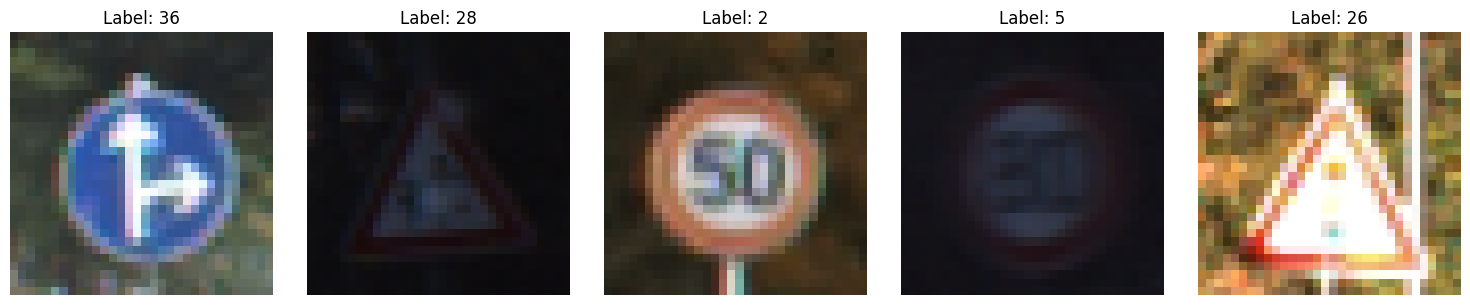


Sınıf dağılımı:
Sınıf 0: 210 örnek
Sınıf 1: 2220 örnek
Sınıf 2: 2250 örnek
Sınıf 3: 1410 örnek
Sınıf 4: 1980 örnek
Sınıf 5: 1860 örnek
Sınıf 6: 420 örnek
Sınıf 7: 1440 örnek
Sınıf 8: 1410 örnek
Sınıf 9: 1470 örnek
Sınıf 10: 2010 örnek
Sınıf 11: 1320 örnek
Sınıf 12: 2100 örnek
Sınıf 13: 2160 örnek
Sınıf 14: 780 örnek
Sınıf 15: 630 örnek
Sınıf 16: 420 örnek
Sınıf 17: 1110 örnek
Sınıf 18: 1200 örnek
Sınıf 19: 210 örnek
Sınıf 20: 360 örnek
Sınıf 21: 330 örnek
Sınıf 22: 390 örnek
Sınıf 23: 510 örnek
Sınıf 24: 270 örnek
Sınıf 25: 1500 örnek
Sınıf 26: 600 örnek
Sınıf 27: 240 örnek
Sınıf 28: 540 örnek
Sınıf 29: 270 örnek
Sınıf 30: 450 örnek
Sınıf 31: 780 örnek
Sınıf 32: 240 örnek
Sınıf 33: 689 örnek
Sınıf 34: 420 örnek
Sınıf 35: 1200 örnek
Sınıf 36: 390 örnek
Sınıf 37: 210 örnek
Sınıf 38: 2070 örnek
Sınıf 39: 300 örnek
Sınıf 40: 360 örnek
Sınıf 41: 240 örnek
Sınıf 42: 240 örnek


In [7]:
#

import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# VERİ YÜKLEME
print("Veri yükleniyor...")

# Train.csv dosyasını oku
train_df = pd.read_csv('GTSRB_data/Train.csv')

images = []
labels = []

print("Görüntüler yükleniyor...")
# Her bir görüntüyü yükle
for idx, row in train_df.iterrows():
    try:
        img_path = os.path.join('GTSRB_data', row['Path'])
        if os.path.exists(img_path):
            img = Image.open(img_path)
            img = img.resize((32, 32))  # Resimleri yeniden boyutlandır
            img_array = np.array(img)
            images.append(img_array)
            labels.append(row['ClassId'])

            # Her 1000 görüntüde bir ilerleme göster
            if (idx + 1) % 1000 == 0:
                print(f"{idx + 1} görüntü yüklendi...")
        else:
            print(f"Dosya bulunamadı: {img_path}")
    except Exception as e:
        print(f"Hata - {img_path}: {str(e)}")
        continue

if len(images) == 0:
    raise ValueError("Hiç görüntü yüklenemedi!")

# Numpy dizilerine dönüştür
X = np.array(images)
y = np.array(labels)

print(f"\nToplam {len(X)} görüntü yüklendi.")
print(f"Görüntü boyutları: {X.shape}")


# VERİ ÖN İŞLEME

print("\nVeri önişleniyor...")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi düzleştir (MLP için)
n_samples_train = X_train.shape[0]
n_samples_test = X_test.shape[0]
n_features = 32 * 32 * 3  # 32x32 RGB görüntüler

X_train_flat = X_train.reshape((n_samples_train, n_features))
X_test_flat = X_test.reshape((n_samples_test, n_features))

# Özellik ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

print("\nVeri önişleme tamamlandı.")
print(f"X_train_scaled: {X_train_scaled.shape}, X_test_scaled: {X_test_scaled.shape}")



# ÖRNEK GÖRÜNTÜLERİ GÖRSELLEŞTİR
plt.figure(figsize=(15, 3))
num_samples = 5  # Gösterilecek örnek sayısı

for i in range(min(num_samples, len(X_train))):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_train[i])
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


#SINIF DAĞILIMINI GÖSTER
print("\nSınıf dağılımı:")
for class_id in np.unique(y):
    print(f"Sınıf {class_id}: {np.sum(y == class_id)} örnek")



In [8]:
X_train_scaled

array([[-0.64552443, -0.60685451, -0.63158095, ...,  0.44420111,
         0.62565511,  0.53604108],
       [-0.96020547, -0.95928677, -0.92729619, ..., -0.88751854,
        -0.87990821, -0.82335196],
       [-0.59307759, -0.6329606 , -0.7601528 , ..., -0.12874804,
        -0.31532197, -0.63366921],
       ...,
       [-0.30461997, -0.24136921,  0.03699264, ..., -0.00486714,
         0.10811772,  0.34635833],
       [-0.57996588, -0.56769537, -0.64443814, ..., -0.31456939,
        -0.23690721, -0.33333819],
       [-0.50129562, -0.22831616, -0.13015076, ..., -0.85654832,
        -0.78581051, -0.72851058]])

MLP modeli eğitiliyor...

MLP Model Performansı:

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        44
           1       0.95      0.95      0.95       474
           2       0.95      0.91      0.93       452
           3       0.95      0.83      0.88       295
           4       0.83      0.99      0.90       420
           5       0.76      0.94      0.84       332
           6       1.00      0.90      0.95        82
           7       0.97      0.91      0.94       276
           8       0.97      0.78      0.86       283
           9       0.98      0.91      0.95       304
          10       0.99      0.98      0.98       349
          11       0.92      0.98      0.95       242
          12       0.99      0.98      0.99       454
          13       0.98      0.99      0.98       441
          14       0.99      0.99      0.99       167
          15       0.98      0.96      0.97       127
        

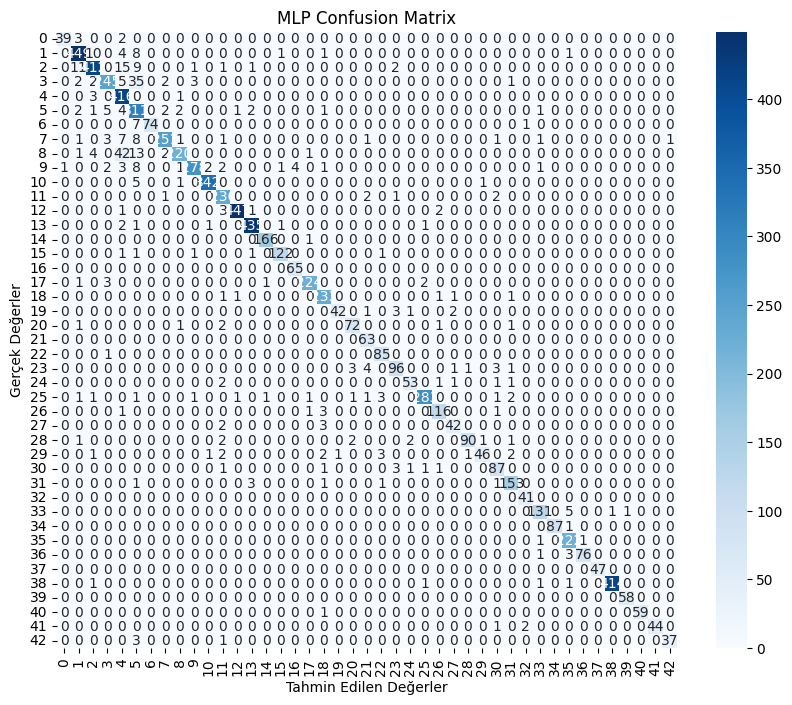

In [9]:
# MLP Model - Temel Versiyon
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("MLP modeli eğitiliyor...")
# Basit MLP modeli oluşturma
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Modeli eğitme
mlp.fit(X_train_scaled, y_train)

# Tahminler
y_pred_mlp = mlp.predict(X_test_scaled)

# Performans değerlendirmesi
print("\nMLP Model Performansı:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='Blues')
plt.title('MLP Confusion Matrix')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()

In [16]:
X_train_scaled

array([[-0.64552443, -0.60685451, -0.63158095, ...,  0.44420111,
         0.62565511,  0.53604108],
       [-0.96020547, -0.95928677, -0.92729619, ..., -0.88751854,
        -0.87990821, -0.82335196],
       [-0.59307759, -0.6329606 , -0.7601528 , ..., -0.12874804,
        -0.31532197, -0.63366921],
       ...,
       [-0.30461997, -0.24136921,  0.03699264, ..., -0.00486714,
         0.10811772,  0.34635833],
       [-0.57996588, -0.56769537, -0.64443814, ..., -0.31456939,
        -0.23690721, -0.33333819],
       [-0.50129562, -0.22831616, -0.13015076, ..., -0.85654832,
        -0.78581051, -0.72851058]])

RBF modeli eğitiliyor...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
785/785 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4050 - loss: 2.3059 - val_accuracy: 0.7343 - val_loss: 0.8926
Epoch 2/50
785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7751 - loss: 0.7645 - val_accuracy: 0.8212 - val_loss: 0.5984
Epoch 3/50
785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8497 - loss: 0.5169 - val_accuracy: 0.8470 - val_loss: 0.5243
Epoch 4/50
785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 0.4442 - val_accuracy: 0.8827 - val_loss: 0.4347
Epoch 5/50
785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8933 - loss: 0.3622 - val_accuracy: 0.8683 - val_loss: 0.4837
Epoch 6/50
785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8890 - loss: 0.3959 - val_accuracy: 0.8824 - val_loss: 0.4550
Epoch 7/50
785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9095 - loss: 0.3019 - val_accuracy: 0.8975 - val_loss: 0.3723
Epoch 8/50
785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9090 - loss: 0.3042 - val_accuracy: 0.

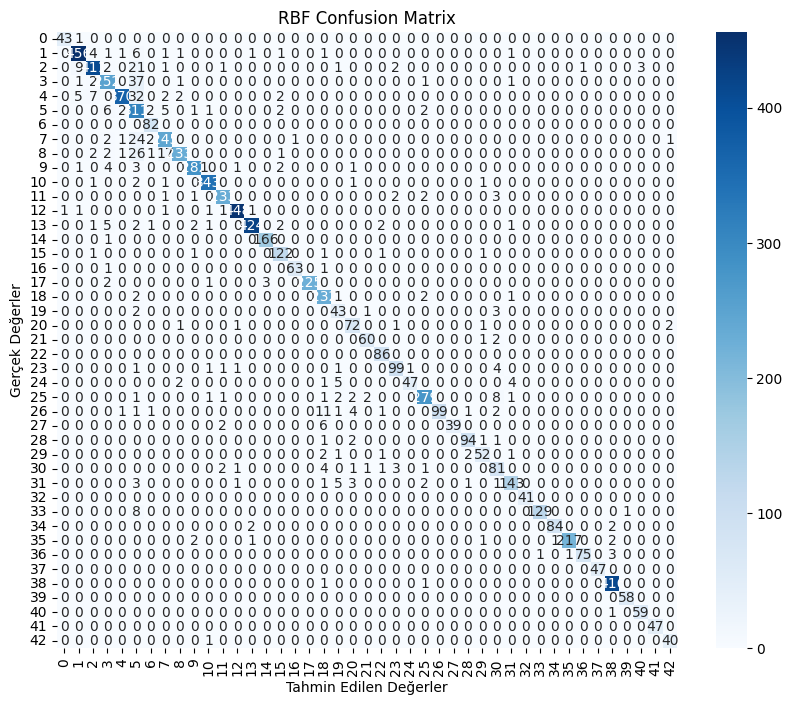

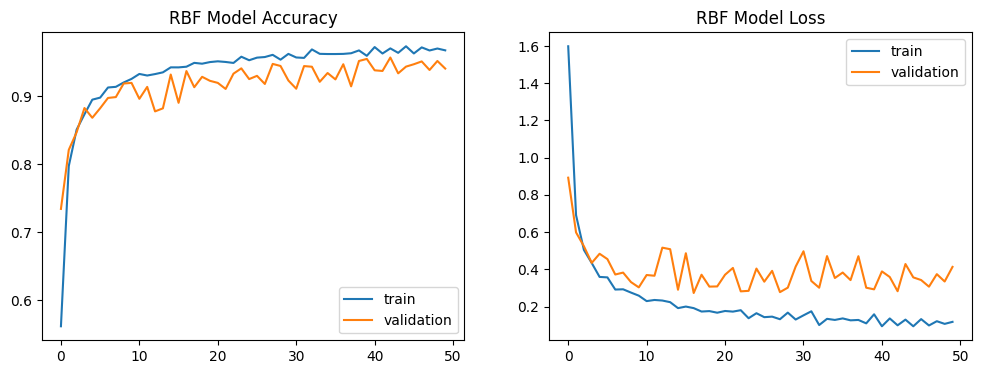

In [10]:
# RBF Model - Temel Versiyon
from tensorflow import keras
from tensorflow.keras import layers

def create_rbf_model(input_shape, num_classes):
    model = keras.Sequential([
        layers.Dense(100, input_shape=(input_shape,), activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# RBF modeli oluşturma ve eğitme
print("RBF modeli eğitiliyor...")
input_shape = X_train_scaled.shape[1]
num_classes = len(np.unique(y_train))

rbf_model = create_rbf_model(input_shape, num_classes)
history = rbf_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# RBF model performans değerlendirmesi
y_pred_rbf = np.argmax(rbf_model.predict(X_test_scaled), axis=1)

print("\nRBF Model Performansı:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title('RBF Confusion Matrix')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()

# Eğitim geçmişini görselleştirme
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('RBF Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('RBF Model Loss')
plt.legend()
plt.show()

MLP için hiperparametre optimizasyonu başlıyor...
Fitting 3 folds for each of 32 candidates, totalling 96 fits

En iyi MLP parametreleri: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 300, 'solver': 'sgd'}
En iyi cross-validation skoru: 0.9637197942482149

En İyi MLP Modeli Performansı:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.95      0.96      0.95       474
           2       0.96      0.96      0.96       452
           3       0.95      0.95      0.95       295
           4       0.96      0.97      0.97       420
           5       0.92      0.93      0.93       332
           6       1.00      1.00      1.00        82
           7       0.92      0.95      0.94       276
           8       0.96      0.95      0.95       283
           9       0.99      0.98      0.99       304
          10       0.99      0.99      0.99   

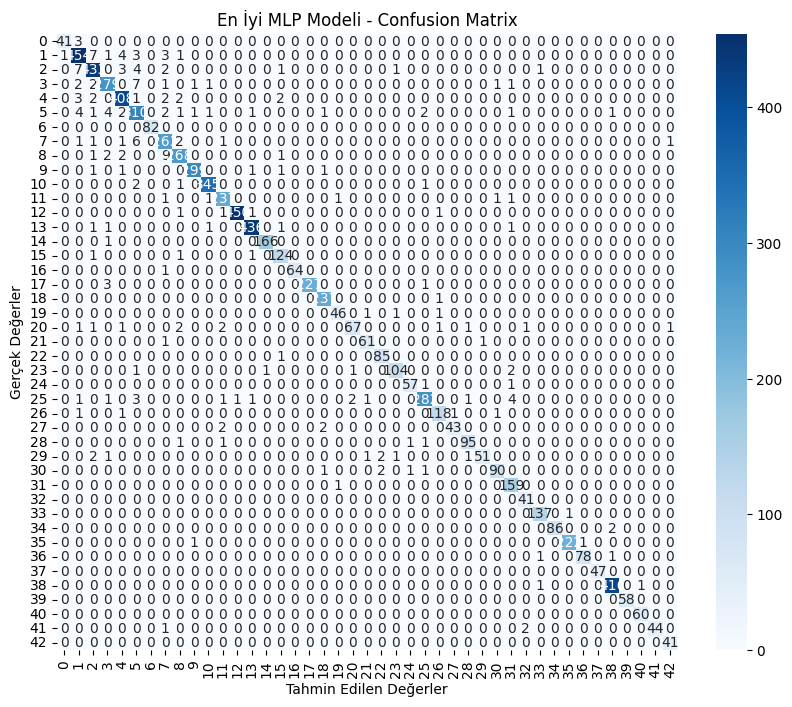

In [11]:
# MLP için Hiperparametre Optimizasyonu

from sklearn.model_selection import GridSearchCV

# Hiperparametre arama alanını tanımlama
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [300],
    'solver': ['adam', 'sgd']
}

# GridSearchCV ile en iyi parametreleri bulma
print("MLP için hiperparametre optimizasyonu başlıyor...")
mlp_grid = GridSearchCV(MLPClassifier(random_state=42),
                       mlp_params,
                       cv=3,
                       n_jobs=-1,
                       verbose=1)

mlp_grid.fit(X_train_scaled, y_train)

print("\nEn iyi MLP parametreleri:", mlp_grid.best_params_)
print("En iyi cross-validation skoru:", mlp_grid.best_score_)

# En iyi model ile tahminler
y_pred_mlp_best = mlp_grid.predict(X_test_scaled)

print("\nEn İyi MLP Modeli Performansı:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp_best))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp_best), annot=True, fmt='d', cmap='Blues')
plt.title('En İyi MLP Modeli - Confusion Matrix')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()

RBF için hiperparametre optimizasyonu başlıyor...

Test ediliyor: neurons1=64, neurons2=32, learning_rate=0.001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Test ediliyor: neurons1=64, neurons2=32, learning_rate=0.01

Test ediliyor: neurons1=64, neurons2=64, learning_rate=0.001

Test ediliyor: neurons1=64, neurons2=64, learning_rate=0.01

Test ediliyor: neurons1=64, neurons2=128, learning_rate=0.001

Test ediliyor: neurons1=64, neurons2=128, learning_rate=0.01

Test ediliyor: neurons1=128, neurons2=32, learning_rate=0.001

Test ediliyor: neurons1=128, neurons2=32, learning_rate=0.01

Test ediliyor: neurons1=128, neurons2=64, learning_rate=0.001

Test ediliyor: neurons1=128, neurons2=64, learning_rate=0.01

Test ediliyor: neurons1=128, neurons2=128, learning_rate=0.001

Test ediliyor: neurons1=128, neurons2=128, learning_rate=0.01

Test ediliyor: neurons1=256, neurons2=32, learning_rate=0.001

Test ediliyor: neurons1=256, neurons2=32, learning_rate=0.01

Test ediliyor: neurons1=256, neurons2=64, learning_rate=0.001

Test ediliyor: neurons1=256, neurons2=64, learning_rate=0.01

Test ediliyor: neurons1=256, neurons2=128, learning_rate=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


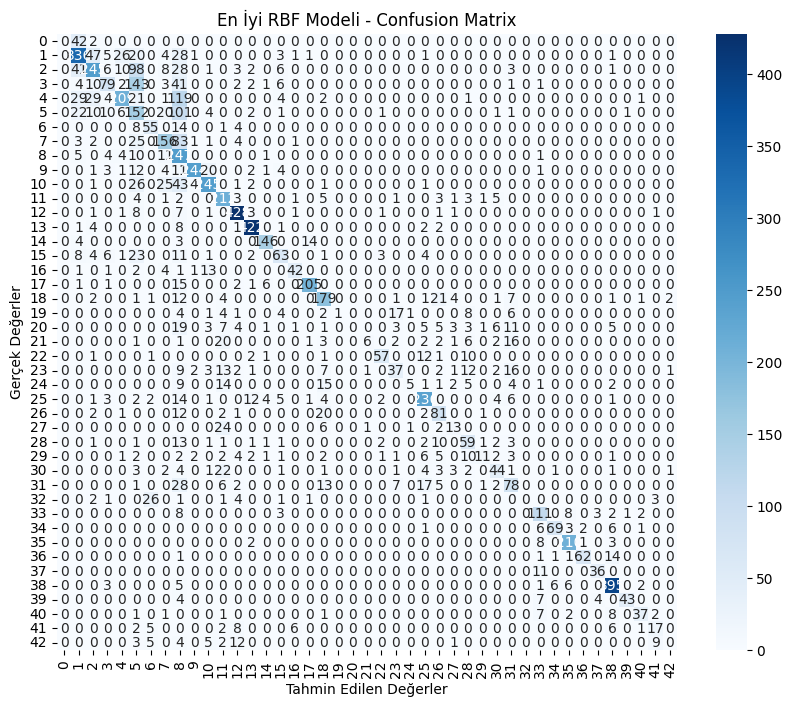

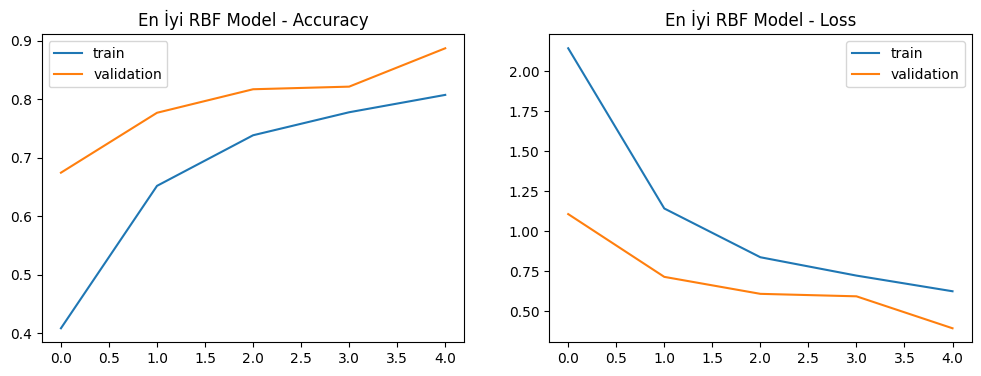

In [12]:
# RBF Hiperparametrezisyon için Gerekli kütüphaneleri import edelim
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_rbf_model_with_params(neurons1, neurons2, learning_rate, input_dim, num_classes):
    """
    RBF modelini tanımlayan ve döndüren fonksiyon.
    """
    model = keras.Sequential([
        layers.Dense(neurons1, input_shape=(input_dim,), activation='relu'),
        layers.Dense(neurons2, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Hiperparametreler
neurons1_options = [64, 128, 256]
neurons2_options = [32, 64, 128]
learning_rates = [0.001, 0.01]

# Veri girişi boyutu ve sınıf sayısı
input_dim = X_train_scaled.shape[1]  # Özellik sayısı
num_classes = len(np.unique(y_train))  # Sınıf sayısı

# Sonuçları saklamak için
results = []

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

print("RBF için hiperparametre optimizasyonu başlıyor...")
# Grid search
for n1 in neurons1_options:
    for n2 in neurons2_options:
        for lr in learning_rates:
            print(f"\nTest ediliyor: neurons1={n1}, neurons2={n2}, learning_rate={lr}")

            # Model oluştur
            model = create_rbf_model_with_params(n1, n2, lr, input_dim, num_classes)

            # Modeli eğit
            history = model.fit(
                X_train_scaled, y_train,
                epochs=50,
                batch_size=32,
                validation_split=0.2,
                callbacks=[early_stopping],
                verbose=0
            )

            # Test seti üzerinde değerlendirme
            test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
            results.append({
                'neurons1': n1,
                'neurons2': n2,
                'learning_rate': lr,
                'test_accuracy': test_acc
            })

# En iyi sonucu bulma
best_result = max(results, key=lambda x: x['test_accuracy'])
print("\nEn iyi RBF parametreleri:", best_result)

# En iyi model ile son bir eğitim
best_model = create_rbf_model_with_params(
    best_result['neurons1'],
    best_result['neurons2'],
    best_result['learning_rate'],
    input_dim,
    num_classes
)

history = best_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# En iyi model performans değerlendirmesi
y_pred_rbf_best = np.argmax(best_model.predict(X_test_scaled), axis=1)

print("\nEn İyi RBF Modeli Performansı:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf_best))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_rbf_best), annot=True, fmt='d', cmap='Blues')
plt.title('En İyi RBF Modeli - Confusion Matrix')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()

# Eğitim geçmişini görselleştirme
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('En İyi RBF Model - Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('En İyi RBF Model - Loss')
plt.legend()
plt.show()


In [ ]:
# GPU'nun aktif olup olmadığını kontrol edin
import torch
print("GPU kullanılıyor mu?", torch.cuda.is_available())


GPU kullanılıyor mu? True
